In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,poly)


In [15]:
#loading dataset
Auto=load_data("Auto")
#printing columns
Auto.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

## Question 8a

In [13]:
#model fitting 
#giving predictor
design=MS(["horsepower"])
X =design.fit_transform(Auto)
#giving responce
y = Auto['mpg']
#model fitting
model = sm.OLS(y, X)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        14:25:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As P value is very low in this case so there is a relation between predictor and response

There relation is not very strong but yes there is a relation between them.

As coefficient of predictor (horsepower) is negative so our relation is negative

In [9]:
#making new dataframe for prediction
#what is the mpg when horsepower is 98
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
#getting prediction
new_predictions = results.get_prediction(newX)
#getting mean prediction
new_predictions.predicted_mean





array([24.46707715])

In [10]:
#Producing confidence interval for predicted values
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [8]:
#producing prediction interval by setting obs=True
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

Text(0, 0.5, 'Horsepower')

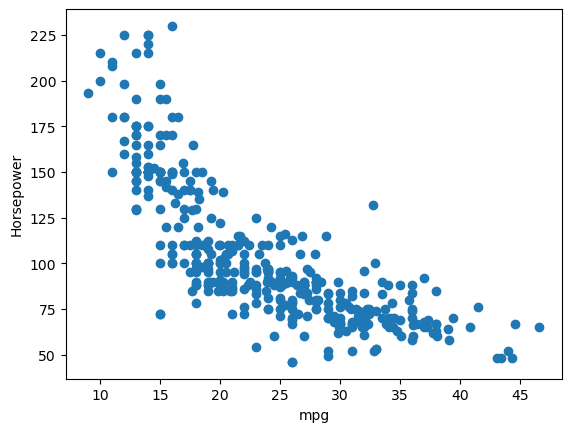

In [48]:
#making a simple scatter plot for checking the relation between mpg and horsepower
ax = Auto.plot.scatter('mpg', 'horsepower')
ax.scatter(Auto.mpg , Auto.horsepower)
ax.set_xlabel('mpg')
ax.set_ylabel('Horsepower')




## Question 8b

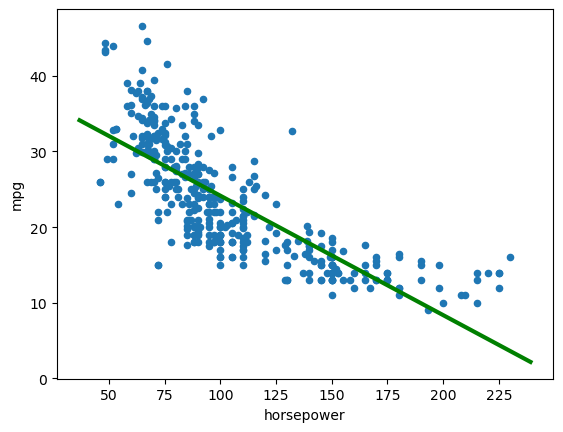

In [52]:
def abline(ax, b, m, *args, **kwargs):
#"Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,results.params[0],results.params[1],'g-',linewidth=3)


## Question 8c

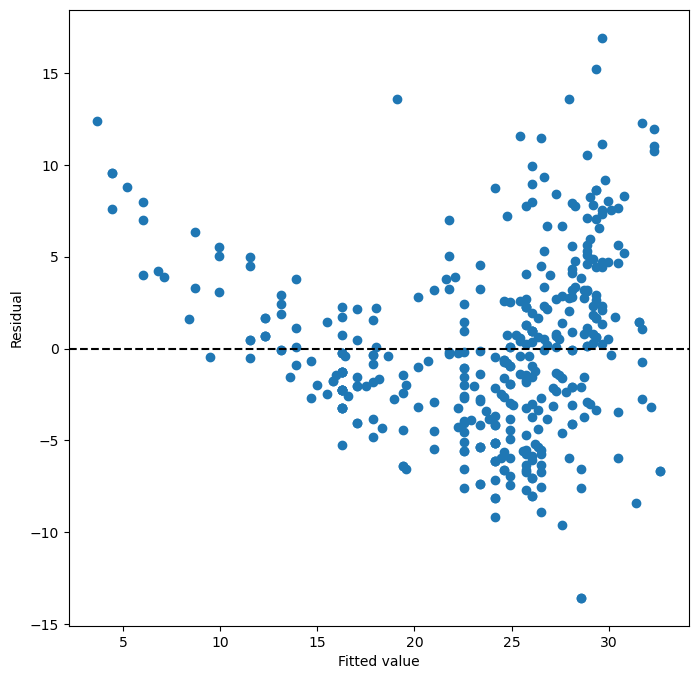

In [11]:
#getting diagnostic plot 
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');






115

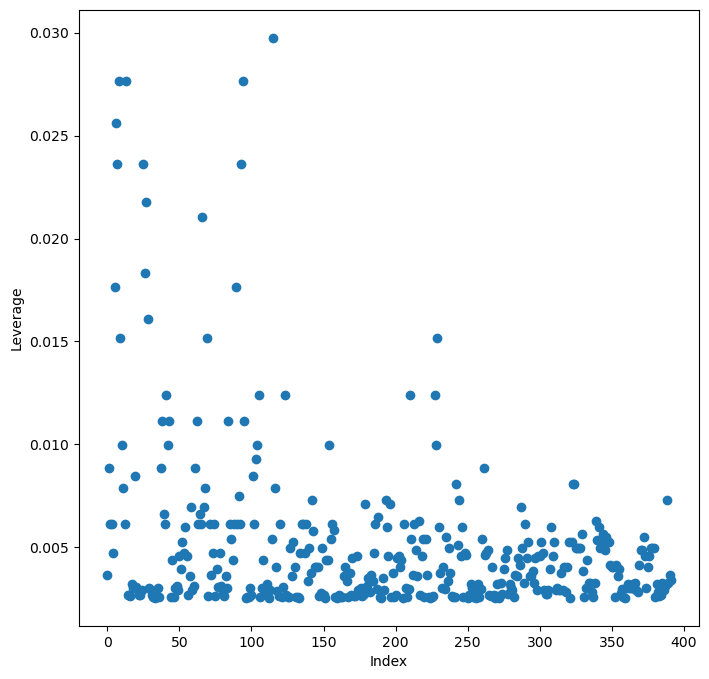

In [12]:
#getting leverage points
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


